In [35]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

# Load the CSV files
df_curated = pd.read_csv('train_curated.csv')
df_noisy = pd.read_csv('train_noisy.csv')
df_siren = pd.read_csv('siren.csv')
df_carhorn = pd.read_csv('car_horn.csv')
# Paths to the audio files
try:
    audio_path_curated = 'C:/Users/SJ/Documents/GitHub/DUNE/@AI/Sound Classification2/freesound-audio-tagging-2019/train_curated'
    audio_path_noisy = 'C:/Users/SJ/Documents/GitHub/DUNE/@AI/Sound Classification2/freesound-audio-tagging-2019/train_noisy'
    print("WINDOWS")
except:
    audio_path_curated = '/Users/owo/HOUSE/@DUNE/@AI/Sound Classification2/freesound-audio-tagging-2019/train_curated'
    audio_path_noisy = '/Users/owo/HOUSE/@DUNE/@AI/Sound Classification2/freesound-audio-tagging-2019/train_noisy'
    print("MAC")

# Concatenate the DataFrames
df = pd.concat([df_curated,df_noisy,df_siren,df_carhorn], ignore_index=True)
df

WINDOWS


,fname,labels
0,0006ae4e.wav,Bark
1,0019ef41.wav,Raindrop
2,001ec0ad.wav,Finger_snapping
3,0026c7cb.wav,Run
4,0026f116.wav,Finger_snapping
...,...,...
26138,99812-1-2-0.wav,car_horn
26139,99812-1-3-0.wav,car_horn
26140,99812-1-4-0.wav,car_horn
26141,99812-1-5-0.wav,car_horn


In [36]:
import librosa
import warnings
import os
def drop_unloadable_files(df, audio_dir):
    count = 0

    # Iterate over the DataFrame
    for i, row in df.iterrows():
        audio_file = os.path.join(audio_dir, row['fname'])
        try:
            # Try to load the audio file
            with warnings.catch_warnings():
                warnings.simplefilter('ignore')
                librosa.load(audio_file, sr=None)
        except Exception:
            # If loading fails, drop the row
            df = df.drop(i)
            count = count + 1
    print("droped : ",count)
    return df

# Drop rows with unloadable audio files from the curated and noisy DataFrames
df_curated = drop_unloadable_files(df_curated, audio_path_curated)
df_noisy = drop_unloadable_files(df_noisy, audio_path_noisy)

# Concatenate the curated and noisy DataFrames
df_concat = pd.concat([df_curated, df_noisy,df_siren,df_carhorn], ignore_index=True)
df_concat.to_csv('csv_train_concat_drop.csv', index=False)
df_concat

droped :  0
droped :  1631


,fname,labels
0,0006ae4e.wav,Bark
1,0019ef41.wav,Raindrop
2,001ec0ad.wav,Finger_snapping
3,0026c7cb.wav,Run
4,0026f116.wav,Finger_snapping
...,...,...
24507,99812-1-2-0.wav,car_horn
24508,99812-1-3-0.wav,car_horn
24509,99812-1-4-0.wav,car_horn
24510,99812-1-5-0.wav,car_horn


In [130]:
import pandas as pd

# Step 1: Read the CSV file
file_path = "csv_train_concat_drop.csv"
df = pd.read_csv(file_path)

# Step 2: Define the selected labels list
selected_labels = ['Motorcycle', 'Slam', 'Yell', 'Screaming', 'Bus',
                   'Traffic_noise_and_roadway_noise', 'Car_passing_by',
                   'Bicycle_bell', 'Knock', 'Bark', 'Scream', 'Shatter',
                   'siren', 'car_horn']

# Step 3: Filter the DataFrame based on selected_labels
filtered_df = df[df['labels'].isin(selected_labels)]

# Step 4: Print the filtered DataFrame
print(filtered_df)
filtered_df.to_csv('train_concat2.csv')

                 fname      labels
0         0006ae4e.wav        Bark
14        00c40a6d.wav       Knock
15        00c4e82c.wav  Motorcycle
23        015a50b9.wav        Bark
31        02286d70.wav         Bus
...                ...         ...
24507  99812-1-2-0.wav    car_horn
24508  99812-1-3-0.wav    car_horn
24509  99812-1-4-0.wav    car_horn
24510  99812-1-5-0.wav    car_horn
24511  99812-1-6-0.wav    car_horn

[4417 rows x 2 columns]


Label Counts:
siren                              929
car_horn                           429
Bus                                317
Traffic_noise_and_roadway_noise    308
Bark                               307
Motorcycle                         297
Screaming                          281
Yell                               273
Bicycle_bell                       266
Slam                               264
Car_passing_by                     255
Shatter                            254
Knock                              237
Name: labels, dtype: int64


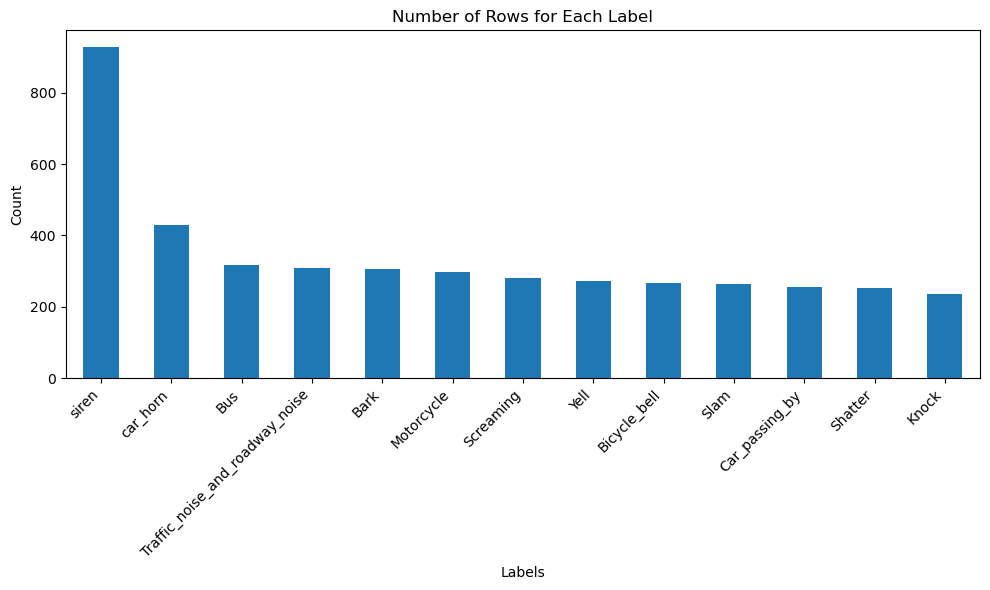

In [131]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Read the CSV file
file_path = "train_concat2.csv"
df = pd.read_csv(file_path)

# Step 2: Define the selected labels list
selected_labels = ['Motorcycle', 'Slam', 'Yell', 'Screaming', 'Bus',
                   'Traffic_noise_and_roadway_noise', 'Car_passing_by',
                   'Bicycle_bell', 'Knock', 'Bark', 'Scream', 'Shatter',
                   'siren', 'car_horn']

# Step 3: Filter the DataFrame based on selected_labels
filtered_df = df[df['labels'].isin(selected_labels)]

# Step 4: Count the occurrences of each label
label_counts = filtered_df['labels'].value_counts()

# Step 5: Print the label counts
print("Label Counts:")
print(label_counts)

# Step 6: Create a bar plot to visualize label counts
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar')
plt.title("Number of Rows for Each Label")
plt.xlabel("Labels")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [132]:
# Get the unique labels
unique_labels = df.labels.unique()

# Create a dictionary mapping labels to indices
label_to_index = {label: index for index, label in enumerate(unique_labels)}

# Print the mapping
label_to_index

{'Bark': 0,
 'Knock': 1,
 'Motorcycle': 2,
 'Bus': 3,
 'Car_passing_by': 4,
 'Slam': 5,
 'Traffic_noise_and_roadway_noise': 6,
 'Shatter': 7,
 'Bicycle_bell': 8,
 'Screaming': 9,
 'Yell': 10,
 'siren': 11,
 'car_horn': 12}

In [136]:
labels_dict = dict(zip(df.fname, df.labels))

list(labels_dict.items())[:5]


4417

In [134]:
import os

# Get the current working directory
current_directory = os.getcwd()

# Relative path to the "train_noisy" directory
train_noisy_relative_path = "train_noisy"
train_noisy_path = os.path.join(current_directory, train_noisy_relative_path)

# Relative path to the "train_curated" directory
train_curated_relative_path = "train_curated"
train_curated_path = os.path.join(current_directory, train_curated_relative_path)
train_curated_path

'c:\\Users\\SJ\\Documents\\GitHub\\DUNE\\@AI\\Sound Classification2\\freesound-audio-tagging-2019\\train_curated'

In [172]:
import librosa
import numpy as np
import warnings
from sklearn.preprocessing import OneHotEncoder

count = 0
drop = 0 


sample_rate = 22050
max_length_frames = 44

one_hot_encoder = OneHotEncoder(sparse=False)
one_hot_encoder.fit(unique_labels.reshape(-1, 1))

def process_audio_file(file_name, directories):
    global count
    global drop
    """
    Load an audio file from one of the given directories, compute its MFCCs, 
    standardize its length, and assign the correct label.
    
    Args:
    - file_name (str): The name of the audio file.
    - directories (list of str): The directories to search for the audio file.

    Returns:
    - A tuple (mfccs, label), where:
      - mfccs is a 2D numpy array of shape (n_mfcc, max_length_frames)
      - label is a 1D numpy array of shape (n_classes,)
    """
    # Skip this file if it doesn't have a label
    if file_name not in labels_dict:
        return None

    # Try to load the audio file from each directory
    for directory in directories:
        try:
            with warnings.catch_warnings():
                warnings.simplefilter("ignore")  # Suppress warnings
                file_path = os.path.join(directory, file_name)
                signal, _ = librosa.load(file_path, sr=sample_rate)
                count = count + 1
                break
        except FileNotFoundError:
            drop = drop + 1
            continue
    else:
        return None
    
    # Normalize the audio signal
    signal = librosa.util.normalize(signal)

    # Compute MFCCs
    mfccs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=13)

    # If the MFCCs are too short, pad them with zeros
    if mfccs.shape[1] < max_length_frames:
        mfccs = np.pad(mfccs, ((0, 0), (0, max_length_frames - mfccs.shape[1])))

    # If the MFCCs are too long, truncate them from a random start index
    if mfccs.shape[1] > max_length_frames:
        start_index = np.random.randint(0, mfccs.shape[1] - max_length_frames)
        mfccs = mfccs[:, start_index:start_index + max_length_frames]

    # Get the label for this file
    label = labels_dict[file_name]

    # One-hot encode the label
    label = one_hot_encoder.transform(np.array(label).reshape(-1, 1))

    return mfccs, label


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [173]:
from tqdm import tqdm

directories = [train_noisy_path, train_curated_path]

# Get a list of .wav files in the labels_dict
wav_files = [file_name for file_name in labels_dict.keys() if file_name.endswith('.wav')]

# Limit the number of files to process
num_files_to_process = len(labels_dict)
wav_files_to_process = wav_files[:num_files_to_process]

# Apply the function with tqdm progress bar
mfccs_and_labels = []
for file_name in tqdm(wav_files_to_process, desc="Processing audio files"):
    result = process_audio_file(file_name, directories)
    if result is not None:
        mfccs_and_labels.append(result)

# After processing the files, get the count and drop values
count, drop

Processing audio files:  92%|█████████▏| 4063/4417 [01:13<00:02, 171.71it/s]c:\ProgramData\anaconda3\Lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
Processing audio files:  99%|█████████▉| 4386/4417 [01:15<00:00, 108.65it/s]c:\ProgramData\anaconda3\Lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
Processing audio files: 100%|██████████| 4417/4417 [0

(4417, 1997)

In [174]:
count, drop

(4417, 1997)

In [175]:
len(mfccs_and_labels)
len(mfccs_and_labels[0])

2

In [176]:
# Separate the MFCCs and labels into two lists
mfccs_list, labels_list = zip(*mfccs_and_labels)

# Convert the lists of MFCCs and labels into 3D and 2D numpy arrays, respectively
mfccs_array = np.stack(mfccs_list)
labels_array = np.squeeze(np.stack(labels_list))  # Squeeze to remove an extra dimension

# Print the shapes of the resulting arrays
mfccs_array.shape, labels_array.shape

((4417, 13, 44), (4417, 13))

In [177]:
import torch
from torch import nn

# Define the model architecture
class AudioClassifier(nn.Module):
    def __init__(self, n_classes):
        super(AudioClassifier, self).__init__()
        
        # Convolutional layers
        self.conv1 = nn.Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.conv2 = nn.Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.conv3 = nn.Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        
        # Max pooling
        self.pool = nn.MaxPool2d(2, 2)
        
        # Fully connected layer
        # The input size of 128*2*11 is determined by the output size of the last convolutional layer
        self.fc = nn.Linear(640, n_classes)
        
        # Activation function
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.conv1(x)
        #print("After conv1: ", x.shape)
        x = self.relu(x)
        x = self.pool(x)
        #print("After pool1: ", x.shape)

        x = self.conv2(x)
        #print("After conv2: ", x.shape)
        x = self.relu(x)
        x = self.pool(x)
        #print("After pool2: ", x.shape)

        x = self.conv3(x)
        #print("After conv3: ", x.shape)
        x = self.relu(x)
        x = self.pool(x)
        #print("After pool3: ", x.shape)

        x = x.view(x.size(0), -1)  # Flatten the tensor
        #print("After flatten: ", x.shape)
        x = self.fc(x)

        return x

# Instantiate the model
model = AudioClassifier(n_classes=labels_array.shape[1])

# Print the model architecture
model


AudioClassifier(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc): Linear(in_features=640, out_features=13, bias=True)
  (relu): ReLU()
)

In [178]:
import torch
from torchvision import models

n_classes=labels_array.shape[1]

# Load the pre-trained model
model = models.resnet18(pretrained=True)

# Modify the last layer to match the number of classes in your dataset
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, n_classes)

# Print the model architecture
print(model)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

c:\ProgramData\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [179]:
from sklearn.model_selection import train_test_split

# Split the data into a training set and a validation set
X_train, X_val, y_train, y_val = train_test_split(mfccs_array, labels_array, test_size=0.2, random_state=42)

# Print the shapes of the training and validation sets
X_train.shape, X_val.shape, y_train.shape, y_val.shape


((3533, 13, 44), (884, 13, 44), (3533, 13), (884, 13))

In [180]:
import torch
from torch.utils.data import DataLoader, TensorDataset
BATCH_SIZE = 32
# Convert the numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).unsqueeze(1)  # Add a channel dimension
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32).unsqueeze(1)  # Add a channel dimension
y_val_tensor = torch.tensor(y_val, dtype=torch.long)

# Create TensorDatasets for the training and validation sets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

# Create DataLoaders for the training and validation sets
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

# Define the loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())




In [181]:
# Import the necessary library
from tqdm import tqdm

# Check if CUDA is available and set PyTorch to use GPU or CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device set to", device)

# Move the model to GPU if available
model = model.to(device)
optimizer = torch.optim.Adam(model.parameters())
# Set the number of epochs
n_epochs = 30

# Create lists to store the losses
train_losses = []
val_losses = []

# Loop over the epochs
for epoch in range(n_epochs):
    # Training
    model.train()
    train_loss = 0.0
    for inputs, targets in tqdm(train_loader, desc=f"Epoch {epoch+1} Training"):
        inputs = inputs.repeat(1, 3, 1, 1).to(device)  # for resnet
        _, targets = targets.max(dim=1)
        targets = targets.to(device)

        # Forward pass
        output = model(inputs)
        loss = loss_fn(output, targets)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item() * inputs.size(0)

    # Validation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, targets in tqdm(val_loader, desc=f"Epoch {epoch+1} Validation"):
            inputs = inputs.repeat(1, 3, 1, 1).to(device)  # for resnet
            _, targets = targets.max(dim=1)  # convert one-hot encoded targets to class indices
            targets = targets.to(device)

            # Forward pass
            output = model(inputs)
            loss = loss_fn(output, targets)
            
            val_loss += loss.item() * inputs.size(0)

    # Calculate average losses
    train_loss = train_loss / len(train_loader.dataset)
    val_loss = val_loss / len(val_loader.dataset)

    # Store the average losses
    train_losses.append(train_loss)
    val_losses.append(val_loss)

    # Print training statistics 
    print(f'Epoch: {epoch} \tTraining Loss: {train_loss:.4f} \tValidation Loss: {val_loss:.4f}')


Device set to cuda:0


Epoch 1 Validation: 100%|██████████| 28/28 [00:00<00:00, 156.86it/s]


Epoch: 0 	Training Loss: 1.9598 	Validation Loss: 1.7920


Epoch 2 Validation: 100%|██████████| 28/28 [00:00<00:00, 167.25it/s]


Epoch: 1 	Training Loss: 1.6868 	Validation Loss: 1.7776


Epoch 3 Validation: 100%|██████████| 28/28 [00:00<00:00, 172.58it/s]


Epoch: 2 	Training Loss: 1.5920 	Validation Loss: 1.5602


Epoch 4 Validation: 100%|██████████| 28/28 [00:00<00:00, 180.07it/s]


Epoch: 3 	Training Loss: 1.5145 	Validation Loss: 1.4860


Epoch 5 Validation: 100%|██████████| 28/28 [00:00<00:00, 169.44it/s]


Epoch: 4 	Training Loss: 1.4635 	Validation Loss: 1.4637


Epoch 6 Validation: 100%|██████████| 28/28 [00:00<00:00, 179.43it/s]


Epoch: 5 	Training Loss: 1.3828 	Validation Loss: 1.4989


Epoch 7 Validation: 100%|██████████| 28/28 [00:00<00:00, 177.10it/s]


Epoch: 6 	Training Loss: 1.3324 	Validation Loss: 1.3611


Epoch 8 Validation: 100%|██████████| 28/28 [00:00<00:00, 177.63it/s]


Epoch: 7 	Training Loss: 1.2817 	Validation Loss: 1.3526


Epoch 9 Validation: 100%|██████████| 28/28 [00:00<00:00, 179.42it/s]


Epoch: 8 	Training Loss: 1.2528 	Validation Loss: 1.4505


Epoch 10 Validation: 100%|██████████| 28/28 [00:00<00:00, 175.95it/s]


Epoch: 9 	Training Loss: 1.2002 	Validation Loss: 1.5074


Epoch 11 Validation: 100%|██████████| 28/28 [00:00<00:00, 178.34it/s]


Epoch: 10 	Training Loss: 1.1155 	Validation Loss: 1.4958


Epoch 12 Validation: 100%|██████████| 28/28 [00:00<00:00, 178.54it/s]


Epoch: 11 	Training Loss: 1.1168 	Validation Loss: 1.3816


Epoch 13 Validation: 100%|██████████| 28/28 [00:00<00:00, 175.92it/s]


Epoch: 12 	Training Loss: 0.9988 	Validation Loss: 1.4663


Epoch 14 Validation: 100%|██████████| 28/28 [00:00<00:00, 179.49it/s]


Epoch: 13 	Training Loss: 0.9625 	Validation Loss: 1.5368


Epoch 15 Validation: 100%|██████████| 28/28 [00:00<00:00, 171.72it/s]


Epoch: 14 	Training Loss: 0.8553 	Validation Loss: 1.5679


Epoch 16 Validation: 100%|██████████| 28/28 [00:00<00:00, 177.64it/s]


Epoch: 15 	Training Loss: 0.8355 	Validation Loss: 1.7971


Epoch 17 Validation: 100%|██████████| 28/28 [00:00<00:00, 168.29it/s]


Epoch: 16 	Training Loss: 0.8716 	Validation Loss: 1.5668


Epoch 18 Validation: 100%|██████████| 28/28 [00:00<00:00, 175.90it/s]


Epoch: 17 	Training Loss: 0.7178 	Validation Loss: 1.6561


Epoch 19 Validation: 100%|██████████| 28/28 [00:00<00:00, 179.28it/s]


Epoch: 18 	Training Loss: 0.7130 	Validation Loss: 1.6472


Epoch 20 Validation: 100%|██████████| 28/28 [00:00<00:00, 180.78it/s]


Epoch: 19 	Training Loss: 0.6260 	Validation Loss: 1.9866


Epoch 21 Validation: 100%|██████████| 28/28 [00:00<00:00, 172.84it/s]


Epoch: 20 	Training Loss: 0.6939 	Validation Loss: 1.7908


Epoch 22 Validation: 100%|██████████| 28/28 [00:00<00:00, 178.73it/s]


Epoch: 21 	Training Loss: 0.5050 	Validation Loss: 2.0178


Epoch 23 Validation: 100%|██████████| 28/28 [00:00<00:00, 180.65it/s]


Epoch: 22 	Training Loss: 0.4391 	Validation Loss: 1.9417


Epoch 24 Validation: 100%|██████████| 28/28 [00:00<00:00, 175.00it/s]


Epoch: 23 	Training Loss: 0.4031 	Validation Loss: 1.9261


Epoch 25 Validation: 100%|██████████| 28/28 [00:00<00:00, 178.07it/s]


Epoch: 24 	Training Loss: 0.4500 	Validation Loss: 2.1057


Epoch 26 Validation: 100%|██████████| 28/28 [00:00<00:00, 178.34it/s]


Epoch: 25 	Training Loss: 0.3419 	Validation Loss: 2.2166


Epoch 27 Validation: 100%|██████████| 28/28 [00:00<00:00, 179.48it/s]


Epoch: 26 	Training Loss: 0.3164 	Validation Loss: 2.2680


Epoch 28 Validation: 100%|██████████| 28/28 [00:00<00:00, 180.21it/s]


Epoch: 27 	Training Loss: 0.2693 	Validation Loss: 2.3944


Epoch 29 Validation: 100%|██████████| 28/28 [00:00<00:00, 181.92it/s]


Epoch: 28 	Training Loss: 0.2801 	Validation Loss: 2.4360


Epoch 30 Validation: 100%|██████████| 28/28 [00:00<00:00, 178.93it/s]

Epoch: 29 	Training Loss: 0.2440 	Validation Loss: 2.6240


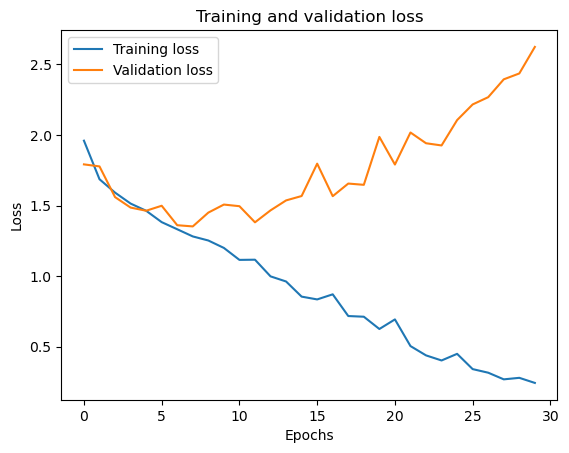

In [182]:
import matplotlib.pyplot as plt
# Plot the training and validation losses
plt.figure()
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [185]:
mean = 0.5
std = 0.5


# Import the necessary library
from tqdm import tqdm

# Check if CUDA is available and set PyTorch to use GPU or CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device set to", device)

# Move the model to GPU if available
model = model.to(device)
optimizer = torch.optim.Adam(model.parameters())
# Set the number of epochs
n_epochs = 30

# Create lists to store the losses
train_losses = []
val_losses = []

# Loop over the epochs
for epoch in range(n_epochs):
    # Training
    model.train()
    train_loss = 0.0
    for inputs, targets in tqdm(train_loader, desc=f"Epoch {epoch+1} Training"):
        inputs = inputs.repeat(1, 3, 1, 1).to(device)  # for resnet
        inputs = (inputs - mean) / std
        _, targets = targets.max(dim=1)
        targets = targets.to(device)

        # Forward pass
        output = model(inputs)
        loss = loss_fn(output, targets)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item() * inputs.size(0)

    # Validation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, targets in tqdm(val_loader, desc=f"Epoch {epoch+1} Validation"):
            inputs = inputs.repeat(1, 3, 1, 1).to(device)  # for resnet
            inputs = (inputs - mean) / std
            _, targets = targets.max(dim=1)  # convert one-hot encoded targets to class indices
            targets = targets.to(device)

            # Forward pass
            output = model(inputs)
            loss = loss_fn(output, targets)
            
            val_loss += loss.item() * inputs.size(0)

    # Calculate average losses
    train_loss = train_loss / len(train_loader.dataset)
    val_loss = val_loss / len(val_loader.dataset)

    # Store the average losses
    train_losses.append(train_loss)
    val_losses.append(val_loss)

    # Print training statistics 
    print(f'Epoch: {epoch} \tTraining Loss: {train_loss:.4f} \tValidation Loss: {val_loss:.4f}')


Device set to cuda:0


Epoch 1 Validation: 100%|██████████| 28/28 [00:00<00:00, 176.10it/s]


Epoch: 0 	Training Loss: 0.1032 	Validation Loss: 3.0002


Epoch 2 Validation: 100%|██████████| 28/28 [00:00<00:00, 176.03it/s]


Epoch: 1 	Training Loss: 0.0866 	Validation Loss: 2.9378


Epoch 3 Validation: 100%|██████████| 28/28 [00:00<00:00, 180.64it/s]


Epoch: 2 	Training Loss: 0.0703 	Validation Loss: 3.0011


Epoch 4 Validation: 100%|██████████| 28/28 [00:00<00:00, 178.87it/s]


Epoch: 3 	Training Loss: 0.0942 	Validation Loss: 2.7911


Epoch 5 Validation: 100%|██████████| 28/28 [00:00<00:00, 173.55it/s]


Epoch: 4 	Training Loss: 0.0794 	Validation Loss: 3.2085


Epoch 6 Validation: 100%|██████████| 28/28 [00:00<00:00, 174.65it/s]


Epoch: 5 	Training Loss: 0.1377 	Validation Loss: 2.5888


Epoch 7 Validation: 100%|██████████| 28/28 [00:00<00:00, 175.11it/s]


Epoch: 6 	Training Loss: 0.0742 	Validation Loss: 2.6697


Epoch 8 Validation: 100%|██████████| 28/28 [00:00<00:00, 175.00it/s]


Epoch: 7 	Training Loss: 0.0821 	Validation Loss: 2.8279


Epoch 9 Validation: 100%|██████████| 28/28 [00:00<00:00, 176.97it/s]


Epoch: 8 	Training Loss: 0.0683 	Validation Loss: 2.7428


Epoch 10 Validation: 100%|██████████| 28/28 [00:00<00:00, 177.33it/s]


Epoch: 9 	Training Loss: 0.0609 	Validation Loss: 2.8071


Epoch 11 Validation: 100%|██████████| 28/28 [00:00<00:00, 175.44it/s]


Epoch: 10 	Training Loss: 0.0794 	Validation Loss: 2.7301


Epoch 12 Validation: 100%|██████████| 28/28 [00:00<00:00, 177.22it/s]


Epoch: 11 	Training Loss: 0.0847 	Validation Loss: 2.9099


Epoch 13 Validation: 100%|██████████| 28/28 [00:00<00:00, 177.87it/s]


Epoch: 12 	Training Loss: 0.1024 	Validation Loss: 2.6445


Epoch 14 Validation: 100%|██████████| 28/28 [00:00<00:00, 177.90it/s]


Epoch: 13 	Training Loss: 0.0452 	Validation Loss: 3.1589


Epoch 15 Validation: 100%|██████████| 28/28 [00:00<00:00, 176.10it/s]


Epoch: 14 	Training Loss: 0.0653 	Validation Loss: 3.6044


Epoch 16 Validation: 100%|██████████| 28/28 [00:00<00:00, 179.49it/s]


Epoch: 15 	Training Loss: 0.1211 	Validation Loss: 2.7956


Epoch 17 Validation: 100%|██████████| 28/28 [00:00<00:00, 179.37it/s]


Epoch: 16 	Training Loss: 0.2858 	Validation Loss: 2.8225


Epoch 18 Validation: 100%|██████████| 28/28 [00:00<00:00, 176.10it/s]


Epoch: 17 	Training Loss: 0.4002 	Validation Loss: 2.3112


Epoch 19 Validation: 100%|██████████| 28/28 [00:00<00:00, 177.92it/s]


Epoch: 18 	Training Loss: 0.1311 	Validation Loss: 2.6768


Epoch 20 Validation: 100%|██████████| 28/28 [00:00<00:00, 180.65it/s]


Epoch: 19 	Training Loss: 0.0647 	Validation Loss: 2.8447


Epoch 21 Validation: 100%|██████████| 28/28 [00:00<00:00, 177.53it/s]


Epoch: 20 	Training Loss: 0.0650 	Validation Loss: 3.0413


Epoch 22 Validation: 100%|██████████| 28/28 [00:00<00:00, 172.31it/s]


Epoch: 21 	Training Loss: 0.0665 	Validation Loss: 2.8617


Epoch 23 Validation: 100%|██████████| 28/28 [00:00<00:00, 177.36it/s]


Epoch: 22 	Training Loss: 0.0662 	Validation Loss: 2.9926


Epoch 24 Validation: 100%|██████████| 28/28 [00:00<00:00, 176.10it/s]


Epoch: 23 	Training Loss: 0.0496 	Validation Loss: 2.7744


Epoch 25 Validation: 100%|██████████| 28/28 [00:00<00:00, 180.65it/s]


Epoch: 24 	Training Loss: 0.0488 	Validation Loss: 2.8034


Epoch 26 Validation: 100%|██████████| 28/28 [00:00<00:00, 177.80it/s]


Epoch: 25 	Training Loss: 0.0533 	Validation Loss: 2.8597


Epoch 27 Validation: 100%|██████████| 28/28 [00:00<00:00, 178.34it/s]


Epoch: 26 	Training Loss: 0.0535 	Validation Loss: 2.8398


Epoch 28 Validation: 100%|██████████| 28/28 [00:00<00:00, 177.22it/s]


Epoch: 27 	Training Loss: 0.0378 	Validation Loss: 3.1742


Epoch 29 Validation: 100%|██████████| 28/28 [00:00<00:00, 180.65it/s]


Epoch: 28 	Training Loss: 0.0511 	Validation Loss: 3.2181


Epoch 30 Validation: 100%|██████████| 28/28 [00:00<00:00, 178.34it/s]

Epoch: 29 	Training Loss: 0.0403 	Validation Loss: 3.3282


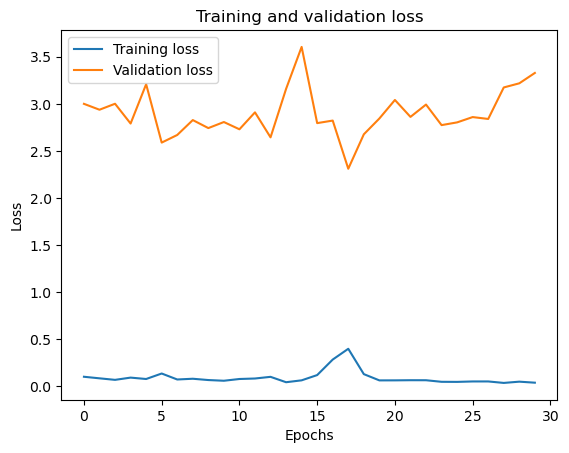

In [186]:
import matplotlib.pyplot as plt
# Plot the training and validation losses
plt.figure()
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [70]:
#Cut audio
import os
import numpy as np
import librosa

def load_audio(fname, sr=22050):
    # Paths to the audio files
    audio_path_curated = 'train_curated'  # Adjust these paths according to your directory structure
    audio_path_noisy = 'train_noisy'  # Adjust these paths according to your directory structure

    # Check if the file exists in the curated directory
    if os.path.exists(os.path.join(audio_path_curated, fname)):
        filename = os.path.join(audio_path_curated, fname)
    # Otherwise, check the noisy directory
    elif os.path.exists(os.path.join(audio_path_noisy, fname)):
        filename = os.path.join(audio_path_noisy, fname)
    else:
        raise FileNotFoundError(f"{fname} not found in both directories.")
    
    # Load the audio file
    y, _ = librosa.load(filename, sr=sr)
    
    return y


In [71]:
#  Augment audio
# 1. random streach
# 2. cut in 2 'durcation' seconds (in random position)
# 3. random pich shift
# 4. random noise 

import random

def augment_audio(y, duration=2, sr=22050): #ducation = 2seconds
    # Apply time stretching
    rate = random.uniform(0.9, 1.1)  # Randomly vary the speed between 80% and 120%
    y = librosa.effects.time_stretch(y, rate = rate)

    ## Cut audio
    # If the audio is too short, pad it with zeros
    if len(y) < sr * duration:
        y = np.pad(y, (0, int(sr * duration) - len(y)))
    
    # If the audio is too long, randomly select a segment
    if len(y) > sr * duration:
        max_start_index = len(y) - int(sr * duration) #audio lengh - 2 seconds
        start_index = np.random.randint(0, max_start_index) # start anywhere except the last 2 seconds
        y = y[start_index:start_index + int(sr * duration)] # cut anywhere 2 seconds

    # Apply pitch shifting
    steps = random.randint(-1, 1)  # Randomly vary the pitch by up to n semitones
    y = librosa.effects.pitch_shift(y, sr = sr , n_steps= steps)

    # Apply additive noise
    noise = np.random.normal(0, 0.01, len(y))  # White noise with a standard deviation of 0.1
    y += noise
    
    return y

In [72]:
def get_mel_spectrogram(y, sr=22050, n_fft=2048, hop_length=512, n_mels=128):
    # Compute the spectrogram
    D = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
    D_abs = np.abs(D)
    # Convert to Mel scale
    mel_spec = librosa.feature.melspectrogram(S=librosa.amplitude_to_db(D_abs), sr=sr, n_mels=n_mels)
    # Normalize
    mel_spec = (mel_spec - np.mean(mel_spec)) / np.std(mel_spec)
    return mel_spec

In [51]:
from tqdm import tqdm
# 1. load audio
# 2. augment audio
# 3. get mel spectrogram
# 4. extend a new labels (since it got bigger)

spectrograms = []
labels = []
print("if the number doesnt increase ,stop the code and run the vscode with admin")
# Load, cut, augment, and get the spectrogram of each audio file 10 times
for i in tqdm(range(len(df))):
    filename = df.iloc[i]['fname']
    label = df.iloc[i].drop('fname').values  # Get the label of the audio file
    # Load and cut the audio
    y = load_audio(filename)
    
    for _ in range(3):    
        # Augment the audio
        y_aug = augment_audio(y,duration=2)
        
        # Get the spectrogram of the augmented audio
        mel_spec = get_mel_spectrogram(y_aug)
        
        # Add the spectrogram to the list
        spectrograms.append(mel_spec)
        
        # Add the label to the list
        labels.append(label)


if the number doesnt increase ,stop the code and run the vscode with admin


 93%|█████████▎| 4711/5061 [21:07<00:33, 10.50it/s]c:\ProgramData\anaconda3\Lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
100%|█████████▉| 5038/5061 [21:56<00:02,  8.55it/s]c:\ProgramData\anaconda3\Lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
100%|█████████▉| 5040/5061 [21:56<00:02,  9.54it/s]c:\ProgramData\anaconda3\Lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
100%|██████████| 5061/5061 [21:59<00:00,  3.84it/s]


In [53]:
# Convert the list of spectrograms and labels to numpy arrays
spectrograms = np.array(spectrograms)
spectrograms[0]

array([[ 2.79442   ,  1.7331772 ,  2.2051938 , ...,  2.279593  ,
        -0.36564645, -2.2140405 ],
       [ 4.0046115 ,  4.9025083 ,  4.6059484 , ...,  0.45981637,
        -2.7780347 , -3.433365  ],
       [ 2.0856059 ,  3.1232657 ,  3.2347822 , ..., -0.25546935,
        -1.2753102 , -0.62225807],
       ...,
       [-0.65993476, -0.385116  , -0.12038442, ...,  0.35345322,
        -0.00870939, -0.22241879],
       [-0.546549  , -0.05254431, -0.4851783 , ...,  0.12559652,
        -0.44097492, -0.75552255],
       [-0.86536986, -0.2098081 , -0.19708656, ..., -0.22394435,
        -0.33812565, -0.76979554]], dtype=float32)

In [54]:
# Save both npy (since it takes too long to make)
np.save('np_spectrograms.npy', spectrograms)
np.save('np_labels_aug.npy',labels)

In [73]:
# Load the spectrograms array from the .npy file
spectrograms_loaded = np.load('np_spectrograms.npy')
labels = np.load('np_labels_aug.npy', allow_pickle=True)

In [74]:
# Check length
print(len(spectrograms_loaded),end=',')
print(len(spectrograms_loaded[0]),end=',')
print(len(spectrograms_loaded[0][0]))
print(len(labels),end=',')
print(len(labels[0]),end=',')

15183,128,87
15183,13,

In [87]:
#if use CNN type 1, if use resnet 18 type 2 , resnet 34 is type 3
def ModelSelect(select):

    if select == 1:
        import torch
        import torch.nn as nn

        class AudioClassifier(nn.Module):
            def __init__(self):
                super(AudioClassifier, self).__init__()
                self.conv1 = nn.Conv2d(1, 64, 3, padding=1)
                self.bn1 = nn.BatchNorm2d(64)  # Add batch normalization
                self.dropout1 = nn.Dropout(0.2)  # Add dropout layer

                self.conv2 = nn.Conv2d(64, 128, 3, padding=1)
                self.bn2 = nn.BatchNorm2d(128)  # Add batch normalization
                self.dropout2 = nn.Dropout(0.2)  # Add dropout layer

                self.fc1 = nn.Linear(128*32*21, 1024)
                self.dropout3 = nn.Dropout(0.5)  # Add dropout layer

                self.fc2 = nn.Linear(1024, len(mlb.classes_))

            def forward(self, x):
                x = x.unsqueeze(1)  # Add an extra dimension for the single channel
                x = self.dropout1(torch.relu(self.bn1(self.conv1(x))))
                x = torch.max_pool2d(x, 2)
                x = self.dropout2(torch.relu(self.bn2(self.conv2(x))))
                x = torch.max_pool2d(x, 2)
                x = x.view(x.size(0), -1)  # Flatten the tensor
                x = self.dropout3(torch.relu(self.fc1(x)))
                x = self.fc2(x)
                return x

        model = AudioClassifier()

        print("CNN")
    if select == 2:
        import torch
        import torch.nn as nn
        from torchvision import models

        class AudioClassifier(nn.Module):
            def __init__(self, num_classes):
                super(AudioClassifier, self).__init__()
                self.resnet = models.resnet18(pretrained=True)
                
                # Modify first layer to take 1-channel input
                self.resnet.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
                
                # Modify last layer to have the correct number of output classes
                num_features = self.resnet.fc.in_features
                self.resnet.fc = nn.Linear(num_features, num_classes)

            def forward(self, x):
                x = x.unsqueeze(1)  # Add an extra dimension for the single channel
                x = self.resnet(x)
                return x

        model = AudioClassifier(num_classes=len(mlb.classes_))
        print("Resnet18")
    if select == 3:
        import torch
        import torch.nn as nn
        from torchvision import models

        class AudioClassifier(nn.Module):
            def __init__(self, num_classes):
                super(AudioClassifier, self).__init__()
                self.resnet = models.resnet34(pretrained=True)
                
                # Modify first layer to take 1-channel input
                self.resnet.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
                
                # Modify last layer to have the correct number of output classes
                num_features = self.resnet.fc.in_features
                self.resnet.fc = nn.Linear(num_features, num_classes)

            def forward(self, x):
                x = x.unsqueeze(1)  # Add an extra dimension for the single channel
                x = self.resnet(x)
                return x

        model = AudioClassifier(num_classes=len(mlb.classes_))
        print("Resnet34")
    return model

In [77]:
# Check if the model is loading successfully
for i in range(1,4):
    print(i)
    model = ModelSelect(i)

1
CNN
2
Resnet18
3


c:\ProgramData\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
c:\ProgramData\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-

Resnet34


In [78]:
from sklearn.model_selection import train_test_split
import numpy as np


# Convert the spectrograms and labels to numpy arrays
X = np.array(spectrograms)
y = np.array(labels)

# Change dtype of y to int
y = y.astype(int)


# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [79]:
import torch
from torch.utils.data import TensorDataset, DataLoader

BATCH_SIZE = 32 # If error, reduce this number


# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

# Convert the training and validation sets to PyTorch tensors
X_train_tensor = torch.from_numpy(X_train).float()
y_train_tensor = torch.from_numpy(y_train).float()
X_val_tensor = torch.from_numpy(X_val).float()
y_val_tensor = torch.from_numpy(y_val).float()

# Create PyTorch datasets from the tensors
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

# Create PyTorch dataloaders from the datasets
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)


1
CNN
device :  cuda


100%|██████████| 380/380 [01:57<00:00,  3.23it/s]


Save model 1
Epoch 1/20, Train Loss: 0.60275, Val Loss: 0.28220, Elapsed Time: 120.16s, Estimated Time Left: 2282.99s


100%|██████████| 380/380 [01:57<00:00,  3.24it/s]


Save model 1
Epoch 2/20, Train Loss: 0.28237, Val Loss: 0.25026, Elapsed Time: 119.90s, Estimated Time Left: 2158.12s


100%|██████████| 380/380 [01:57<00:00,  3.23it/s]


Save model 1
Epoch 3/20, Train Loss: 0.24761, Val Loss: 0.23937, Elapsed Time: 120.10s, Estimated Time Left: 2041.72s


100%|██████████| 380/380 [01:55<00:00,  3.30it/s]


Epoch 4/20, Train Loss: 0.23284, Val Loss: 0.24043, Elapsed Time: 117.35s, Estimated Time Left: 1877.65s


100%|██████████| 380/380 [01:57<00:00,  3.24it/s]


Epoch 5/20, Train Loss: 0.22739, Val Loss: 0.24917, Elapsed Time: 119.43s, Estimated Time Left: 1791.41s


100%|██████████| 380/380 [01:56<00:00,  3.26it/s]


Epoch 6/20, Train Loss: 0.22881, Val Loss: 0.25285, Elapsed Time: 118.53s, Estimated Time Left: 1659.43s


100%|██████████| 380/380 [01:56<00:00,  3.26it/s]


Epoch 7/20, Train Loss: 0.22935, Val Loss: 0.28130, Elapsed Time: 118.63s, Estimated Time Left: 1542.23s


100%|██████████| 380/380 [01:56<00:00,  3.26it/s]


Epoch 8/20, Train Loss: 0.22966, Val Loss: 0.25921, Elapsed Time: 118.70s, Estimated Time Left: 1424.39s


100%|██████████| 380/380 [01:56<00:00,  3.27it/s]


Epoch 9/20, Train Loss: 0.22814, Val Loss: 0.24480, Elapsed Time: 118.44s, Estimated Time Left: 1302.87s


100%|██████████| 380/380 [01:56<00:00,  3.27it/s]


Epoch 10/20, Train Loss: 0.22471, Val Loss: 0.25613, Elapsed Time: 118.40s, Estimated Time Left: 1183.98s


100%|██████████| 380/380 [01:56<00:00,  3.26it/s]


Save model 1
Epoch 11/20, Train Loss: 0.22135, Val Loss: 0.22966, Elapsed Time: 119.11s, Estimated Time Left: 1072.03s


100%|██████████| 380/380 [01:56<00:00,  3.27it/s]


Epoch 12/20, Train Loss: 0.21912, Val Loss: 0.24558, Elapsed Time: 118.40s, Estimated Time Left: 947.21s


100%|██████████| 380/380 [01:56<00:00,  3.26it/s]


Epoch 13/20, Train Loss: 0.21789, Val Loss: 0.22974, Elapsed Time: 118.48s, Estimated Time Left: 829.33s


100%|██████████| 380/380 [01:56<00:00,  3.26it/s]


Save model 1
Epoch 14/20, Train Loss: 0.21652, Val Loss: 0.22721, Elapsed Time: 119.02s, Estimated Time Left: 714.12s


100%|██████████| 380/380 [01:56<00:00,  3.27it/s]


Epoch 15/20, Train Loss: 0.21692, Val Loss: 0.23632, Elapsed Time: 118.43s, Estimated Time Left: 592.14s


100%|██████████| 380/380 [01:56<00:00,  3.27it/s]


Epoch 16/20, Train Loss: 0.21590, Val Loss: 0.22758, Elapsed Time: 118.43s, Estimated Time Left: 473.73s


100%|██████████| 380/380 [01:56<00:00,  3.26it/s]


Save model 1
Epoch 17/20, Train Loss: 0.21533, Val Loss: 0.21567, Elapsed Time: 118.96s, Estimated Time Left: 356.89s


100%|██████████| 380/380 [01:56<00:00,  3.27it/s]


Epoch 18/20, Train Loss: 0.21437, Val Loss: 0.23053, Elapsed Time: 118.43s, Estimated Time Left: 236.86s


100%|██████████| 380/380 [01:56<00:00,  3.27it/s]


Epoch 19/20, Train Loss: 0.21490, Val Loss: 0.23616, Elapsed Time: 118.39s, Estimated Time Left: 118.39s


100%|██████████| 380/380 [01:56<00:00,  3.25it/s]


Epoch 20/20, Train Loss: 0.21493, Val Loss: 0.23216, Elapsed Time: 118.98s, Estimated Time Left: 0.00s
Finished Training


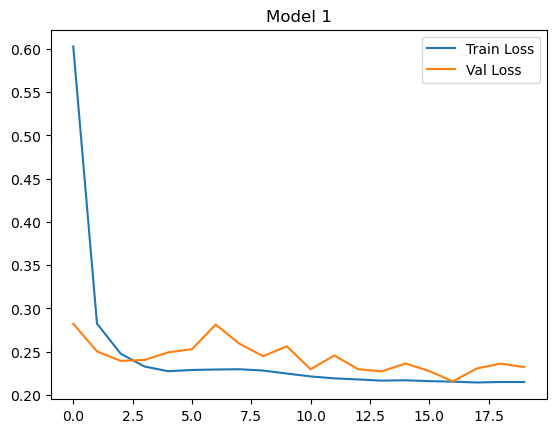

2
Resnet18
device :  cuda


100%|██████████| 380/380 [00:24<00:00, 15.74it/s]


Save model 2
Epoch 1/20, Train Loss: 0.23826, Val Loss: 0.27183, Elapsed Time: 25.81s, Estimated Time Left: 490.31s


100%|██████████| 380/380 [00:24<00:00, 15.64it/s]


Save model 2
Epoch 2/20, Train Loss: 0.22184, Val Loss: 0.23028, Elapsed Time: 25.92s, Estimated Time Left: 466.58s


100%|██████████| 380/380 [00:24<00:00, 15.75it/s]


Save model 2
Epoch 3/20, Train Loss: 0.20796, Val Loss: 0.21612, Elapsed Time: 25.76s, Estimated Time Left: 438.00s


100%|██████████| 380/380 [00:24<00:00, 15.77it/s]


Epoch 4/20, Train Loss: 0.20473, Val Loss: 0.22208, Elapsed Time: 25.68s, Estimated Time Left: 410.83s


100%|██████████| 380/380 [00:24<00:00, 15.76it/s]


Epoch 5/20, Train Loss: 0.20639, Val Loss: 0.22024, Elapsed Time: 25.70s, Estimated Time Left: 385.48s


100%|██████████| 380/380 [00:24<00:00, 15.68it/s]


Save model 2
Epoch 6/20, Train Loss: 0.21129, Val Loss: 0.21414, Elapsed Time: 25.89s, Estimated Time Left: 362.50s


100%|██████████| 380/380 [00:24<00:00, 15.38it/s]


Epoch 7/20, Train Loss: 0.22064, Val Loss: 0.27249, Elapsed Time: 26.30s, Estimated Time Left: 341.94s


100%|██████████| 380/380 [00:56<00:00,  6.67it/s]


Epoch 8/20, Train Loss: 0.22681, Val Loss: 0.23718, Elapsed Time: 69.86s, Estimated Time Left: 838.33s


100%|██████████| 380/380 [02:13<00:00,  2.85it/s]


Epoch 9/20, Train Loss: 0.23090, Val Loss: 0.24160, Elapsed Time: 139.00s, Estimated Time Left: 1529.05s


100%|██████████| 380/380 [01:01<00:00,  6.13it/s]


Epoch 10/20, Train Loss: 0.23676, Val Loss: 0.24259, Elapsed Time: 66.14s, Estimated Time Left: 661.41s


100%|██████████| 380/380 [01:00<00:00,  6.24it/s]


Epoch 11/20, Train Loss: 0.23674, Val Loss: 0.23979, Elapsed Time: 64.12s, Estimated Time Left: 577.08s


100%|██████████| 380/380 [00:59<00:00,  6.35it/s]


Epoch 12/20, Train Loss: 0.23391, Val Loss: 0.23702, Elapsed Time: 61.46s, Estimated Time Left: 491.70s


100%|██████████| 380/380 [00:24<00:00, 15.57it/s]


Epoch 13/20, Train Loss: 0.23217, Val Loss: 0.23345, Elapsed Time: 26.01s, Estimated Time Left: 182.10s


100%|██████████| 380/380 [00:24<00:00, 15.76it/s]


Epoch 14/20, Train Loss: 0.23112, Val Loss: 0.22970, Elapsed Time: 25.71s, Estimated Time Left: 154.24s


100%|██████████| 380/380 [00:24<00:00, 15.74it/s]


Epoch 15/20, Train Loss: 0.23049, Val Loss: 0.24959, Elapsed Time: 25.73s, Estimated Time Left: 128.63s


100%|██████████| 380/380 [00:24<00:00, 15.43it/s]


Epoch 16/20, Train Loss: 0.23046, Val Loss: 0.23002, Elapsed Time: 26.21s, Estimated Time Left: 104.85s


100%|██████████| 380/380 [00:59<00:00,  6.42it/s]


Epoch 17/20, Train Loss: 0.23005, Val Loss: 0.27759, Elapsed Time: 64.57s, Estimated Time Left: 193.72s


100%|██████████| 380/380 [01:04<00:00,  5.91it/s]


Epoch 18/20, Train Loss: 0.22975, Val Loss: 0.24227, Elapsed Time: 69.29s, Estimated Time Left: 138.58s


100%|██████████| 380/380 [01:13<00:00,  5.16it/s]


Epoch 19/20, Train Loss: 0.22987, Val Loss: 0.22759, Elapsed Time: 77.09s, Estimated Time Left: 77.09s


100%|██████████| 380/380 [01:56<00:00,  3.27it/s]


Epoch 20/20, Train Loss: 0.22926, Val Loss: 0.23511, Elapsed Time: 121.73s, Estimated Time Left: 0.00s
Finished Training


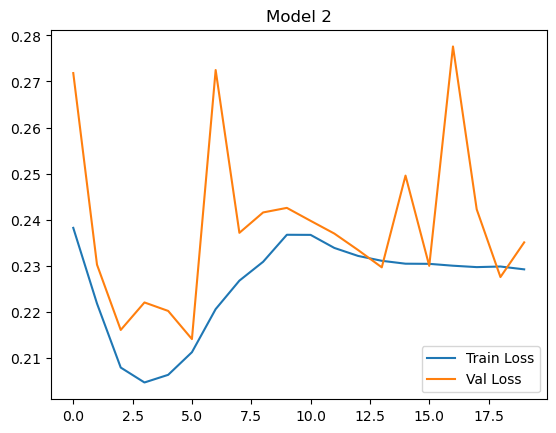

3
Resnet34
device :  cuda


100%|██████████| 380/380 [09:02<00:00,  1.43s/it]


Save model 3
Epoch 1/20, Train Loss: 0.25151, Val Loss: 0.25427, Elapsed Time: 994.52s, Estimated Time Left: 18895.95s


100%|██████████| 380/380 [06:25<00:00,  1.01s/it] 


Epoch 2/20, Train Loss: 0.23213, Val Loss: 0.26467, Elapsed Time: 400.53s, Estimated Time Left: 7209.60s


100%|██████████| 380/380 [02:05<00:00,  3.03it/s]


Save model 3
Epoch 3/20, Train Loss: 0.22002, Val Loss: 0.22735, Elapsed Time: 140.26s, Estimated Time Left: 2384.50s


100%|██████████| 380/380 [02:05<00:00,  3.03it/s]


Epoch 4/20, Train Loss: 0.21853, Val Loss: 0.23385, Elapsed Time: 140.12s, Estimated Time Left: 2241.98s


100%|██████████| 380/380 [02:05<00:00,  3.03it/s]


Epoch 5/20, Train Loss: 0.21947, Val Loss: 0.23323, Elapsed Time: 140.15s, Estimated Time Left: 2102.21s


100%|██████████| 380/380 [02:07<00:00,  2.98it/s]


Epoch 6/20, Train Loss: 0.22245, Val Loss: 0.23869, Elapsed Time: 142.03s, Estimated Time Left: 1988.46s


100%|██████████| 380/380 [02:05<00:00,  3.03it/s]


Epoch 7/20, Train Loss: 0.22873, Val Loss: 0.24345, Elapsed Time: 139.78s, Estimated Time Left: 1817.14s


100%|██████████| 380/380 [02:05<00:00,  3.04it/s]


Epoch 8/20, Train Loss: 0.23173, Val Loss: 0.25643, Elapsed Time: 139.73s, Estimated Time Left: 1676.75s


100%|██████████| 380/380 [02:08<00:00,  2.96it/s]


Epoch 9/20, Train Loss: 0.23365, Val Loss: 0.23644, Elapsed Time: 143.47s, Estimated Time Left: 1578.22s


100%|██████████| 380/380 [02:08<00:00,  2.96it/s]


Epoch 10/20, Train Loss: 0.23314, Val Loss: 0.24407, Elapsed Time: 142.90s, Estimated Time Left: 1428.98s


100%|██████████| 380/380 [02:06<00:00,  3.00it/s]


Save model 3
Epoch 11/20, Train Loss: 0.23188, Val Loss: 0.22720, Elapsed Time: 142.09s, Estimated Time Left: 1278.85s


100%|██████████| 380/380 [02:07<00:00,  2.97it/s]


Epoch 12/20, Train Loss: 0.23157, Val Loss: 0.24085, Elapsed Time: 142.32s, Estimated Time Left: 1138.52s


100%|██████████| 380/380 [02:05<00:00,  3.02it/s]


Epoch 13/20, Train Loss: 0.23068, Val Loss: 0.24069, Elapsed Time: 140.35s, Estimated Time Left: 982.42s


100%|██████████| 380/380 [02:08<00:00,  2.96it/s]


Epoch 14/20, Train Loss: 0.23021, Val Loss: 0.24048, Elapsed Time: 133.58s, Estimated Time Left: 801.47s


100%|██████████| 380/380 [01:50<00:00,  3.43it/s]


Epoch 15/20, Train Loss: 0.22994, Val Loss: 0.25032, Elapsed Time: 116.15s, Estimated Time Left: 580.75s


100%|██████████| 380/380 [01:51<00:00,  3.41it/s]


Epoch 16/20, Train Loss: 0.22921, Val Loss: 0.23760, Elapsed Time: 116.67s, Estimated Time Left: 466.68s


100%|██████████| 380/380 [01:50<00:00,  3.44it/s]


Epoch 17/20, Train Loss: 0.22900, Val Loss: 0.23872, Elapsed Time: 115.74s, Estimated Time Left: 347.22s


100%|██████████| 380/380 [01:50<00:00,  3.44it/s]


Epoch 18/20, Train Loss: 0.22882, Val Loss: 0.23447, Elapsed Time: 115.80s, Estimated Time Left: 231.60s


100%|██████████| 380/380 [01:50<00:00,  3.44it/s]


Epoch 19/20, Train Loss: 0.22918, Val Loss: 0.22979, Elapsed Time: 115.75s, Estimated Time Left: 115.75s


100%|██████████| 380/380 [01:50<00:00,  3.43it/s]


Epoch 20/20, Train Loss: 0.22832, Val Loss: 0.23112, Elapsed Time: 115.87s, Estimated Time Left: 0.00s
Finished Training


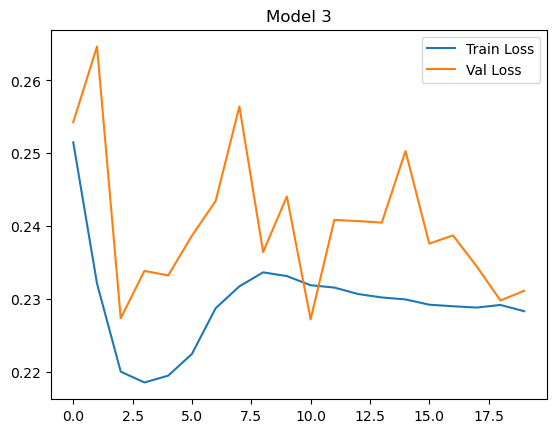

In [80]:
for i in range(1,4):
    print(i)
    model = ModelSelect(i)
    import torch
    import time
    import torch.nn as nn
    from torch.optim import Adam
    import matplotlib.pyplot as plt
    from torch.nn import DataParallel
    import platform
    device = 'mps' if platform.system() == 'Darwin' else torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print("device : ",device)
    # Create the model, loss function and optimizer
    model.to(device)
    if torch.cuda.device_count() > 1:  # Check if multiple GPUs are available
        print("Let's use", torch.cuda.device_count(), "GPUs!")
        model = DataParallel(model)
        
    criterion = nn.BCEWithLogitsLoss()
    optimizer = Adam(model.parameters(), weight_decay=0.01)  # Add weight decay for L2 regularization

    # For storing losses
    train_losses = []
    val_losses = []

    # Training loop
    num_epochs = 20
    best_loss = float('inf')
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        start_time = time.time()

        for inputs, labels in tqdm(train_loader):
            #print(inputs.shape)
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        train_loss = running_loss / len(train_loader)
        train_losses.append(train_loss)

        # Validation
        model.eval()
        running_loss = 0.0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                running_loss += loss.item()

        val_loss = running_loss / len(val_loader)
        val_losses.append(val_loss)

        # Save the model if it's the best so far
        if val_loss < best_loss:
            model_name = f'AI2_model{i}.pth'  # Unique name for each model
            torch.save(model.state_dict(), model_name)
            best_loss = val_loss
            print(f"Save model {i}")

        end_time = time.time()
        elapsed_time = end_time - start_time
        estimated_time = elapsed_time * (num_epochs - epoch - 1)
        print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_loss:.5f}, Val Loss: {val_loss:.5f}, Elapsed Time: {elapsed_time:.2f}s, Estimated Time Left: {estimated_time:.2f}s")

    print("Finished Training")

    # Plot the losses
    plt.figure()
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Val Loss')
    plt.title(f'Model {i}')  # label the plot with the model number
    plt.legend()
    plt.savefig(f'model_{i}_losses.png')  # save the figure as a png
    plt.show()

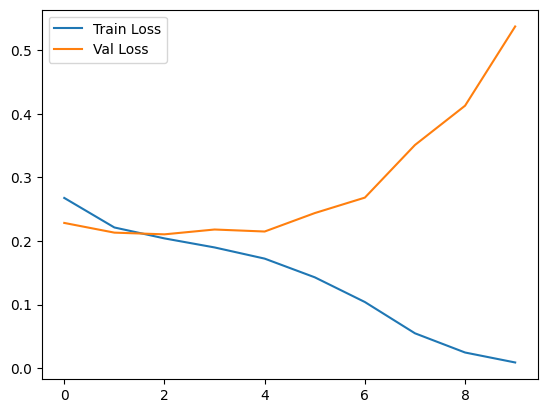

In [ ]:
# Plot the losses
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.legend()
plt.show()

In [98]:
from sklearn.metrics import accuracy_score

def compute_accuracy(model, dataloader, device):
    model.eval()  # Set the model to evaluation mode
    model.to(device)
    correct_predictions = 0
    total_predictions = 0

    with torch.no_grad():  # Disable gradient calculations
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            # Get model outputs
            outputs = model(inputs)
            
            # Convert model outputs to probabilities
            probs = torch.sigmoid(outputs)
            
            # Convert probabilities to binary outputs
            preds = (probs > 0.5).float()
            
            # Compute the number of correct predictions
            correct_predictions += (preds == labels).sum().item()
            total_predictions += labels.numel()
            
    accuracy = correct_predictions / total_predictions
    return accuracy
print(compute_accuracy(ModelSelect(3),val_loader,'cuda'))

c:\ProgramData\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Resnet34
0.5256705757199666


In [ ]:
# DEVICE

import sounddevice as sd
import librosa
import numpy as np
import torch

def get_mel_spectrogram(y, sr=22050, n_fft=2048, hop_length=512, n_mels=128):
    # Compute the spectrogram
    D = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
    D_abs = np.abs(D)
    # Convert to Mel scale
    mel_spec = librosa.feature.melspectrogram(S=librosa.amplitude_to_db(D_abs), sr=sr, n_mels=n_mels)
    return mel_spec

# Load the trained model
model = AudioClassifier()

try:
    model.load_state_dict(torch.load('AI2.pth'))
except:
    try:
        model.load_state_dict(torch.load('AI2.pth', map_location=torch.device('cpu')))
    except:
        state_dict = torch.load('AI2.pth', map_location=torch.device('cpu'))
        new_state_dict = {k.replace("module.", ""): v for k, v in state_dict.items()}
model.eval()

# Record audio
duration = 2  # seconds
fs = 44100  # Sample rate
recording = sd.rec(int(duration * fs), samplerate=fs, channels=1)
sd.wait()  # Wait until recording is finished

# Preprocess audio
recording = np.squeeze(recording)  # Remove the singleton dimension
recording = librosa.resample(recording, orig_sr=fs, target_sr=22050)  # Resample the recording
mel_spec = get_mel_spectrogram(recording)  # Compute the Mel spectrogram

# Make prediction
mel_spec = torch.from_numpy(mel_spec).unsqueeze(0).float()  # Add two singleton dimensions at the beginning
outputs = model(mel_spec)
probs = torch.nn.functional.softmax(outputs, dim=1)
top_prob, top_label = torch.max(probs, dim=1)

#print(f"Predicted label: {le.inverse_transform([top_label.item()])[0]}")
#print(f"Probability: {top_prob.item() * 100:.2f}%")
# Define the threshold
threshold = 0.0

# Apply threshold to probabilities
high_prob_mask = probs > threshold


# Convert probabilities tensor to numpy array
probs_array = probs.detach().numpy()

# Iterate over all labels and their corresponding probabilities
for label, prob in zip(mlb.classes_, probs_array[0]):
    print(f"Label: {label}, Probability: {prob * 100:.2f}%")

# Get labels for high-probability predictions

#high_prob_labels = le.inverse_transform(torch.where(high_prob_mask)[1])
# Get probabilities for high-confidence predictions
high_prob_probs = probs[high_prob_mask]

# Get labels for high-confidence predictions
high_prob_labels = mlb.inverse_transform(high_prob_mask.numpy())

# Convert high_prob_labels and high_prob_probs to lists
high_prob_labels = high_prob_labels[0]
high_prob_probs = high_prob_probs.tolist()

# Print labels and corresponding probabilities
for label, prob in zip(high_prob_labels, high_prob_probs):
    print(f"Predicted label: {label}, Probability: {prob * 100:.2f}%")


print(f"Predicted labels: {high_prob_labels}")


Predicted label: siren, Probability: 100.00%
Predicted labels: ('siren',)


# Diary
2023.07.24 0109i

I honestly spent like 15 hours to make this today. It took a lot of time but since I did 'urban 8 sound' before. It was slightly OK but still frustrating. I was almost done finishing this project then I noticed that some of the label has MORE than one label at a time. Then I have to do this whole thing over again . That was my first drag, and the second drag was at the fact I accidentally deleted the whole thing pressing undo in GitHub. Thankfully I had all the things in chat GPT, so that from there I was easily recovered.  
I still have a problem with real time analizer but I can sort it out later  
I have to go to work tommorrow, I have to go to sleep.  


2023.07.25 1555i
